# Clustering

### Is spending more money on transfers the reason for Liverpool's success?

In [1]:
#loading libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Premier_League.csv',index_col=0) # load the file we used in Data cleaning and EDA.

In [3]:
data =data.drop_duplicates()

In [5]:
data.shape # there were 380 matches in 10 years

(380, 44)

In [6]:
data.head()

,Year,Spending,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Target_Home%,Target_Away%,Manager,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw,Diff_Score
0,FY1819,-143.7,2018-12-08,Liverpool,West Ham,4,0,H,2,0,...,44.44,40.00,Jürgen Klopp,1,0,0,0,0,0,4
1,FY1819,-143.7,2018-08-20,Crystal Palace,Liverpool,0,2,A,0,1,...,25.00,37.50,Jürgen Klopp,0,1,0,0,0,0,2
2,FY1819,-143.7,2018-08-25,Liverpool,Brighton,1,0,H,1,0,...,36.36,33.33,Jürgen Klopp,1,0,0,0,0,0,1
3,FY1819,-143.7,2018-01-09,Leicester,Liverpool,1,2,A,0,2,...,41.67,40.00,Jürgen Klopp,0,1,0,0,0,0,1
4,FY1819,-143.7,2018-09-15,Tottenham,Liverpool,1,2,A,0,1,...,27.27,58.82,Jürgen Klopp,0,1,0,0,0,0,1


### Missing Values 

In [99]:
# Missing values
data.isnull().sum().sum()

0

choosing columns that gives more information about their success. 

In [7]:
new_data = data.drop(['Year','Date','Manager','HomeTeam','AwayTeam','MatchWinner', 'halftimeWinner','FY','Referee','FTR','HTR'],axis=1)

In [8]:
other = data[['Year','Date','Manager','HomeTeam','AwayTeam','MatchWinner', 'halftimeWinner','FY','Referee','FTR','HTR']]

In [21]:
new_data.head()

,Spending,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,...,HT_Loss,Target_Home%,Target_Away%,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw,Diff_Score
0,-143.7,4,0,2,0,18,5,8,2,14,...,0,44.44,40.00,1,0,0,0,0,0,4
1,-143.7,0,2,0,1,8,16,2,6,6,...,0,25.00,37.50,0,1,0,0,0,0,2
2,-143.7,1,0,1,0,22,6,8,2,8,...,0,36.36,33.33,1,0,0,0,0,0,1
3,-143.7,1,2,0,2,12,10,5,4,9,...,0,41.67,40.00,0,1,0,0,0,0,1
4,-143.7,1,2,0,1,11,17,3,10,17,...,0,27.27,58.82,0,1,0,0,0,0,1


## Scaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(new_data)
data_transformed = mms.transform(new_data)

# K-Mean Clustering 

In [24]:
#loading the library 
from sklearn.cluster import KMeans

In [25]:
# elbow curve

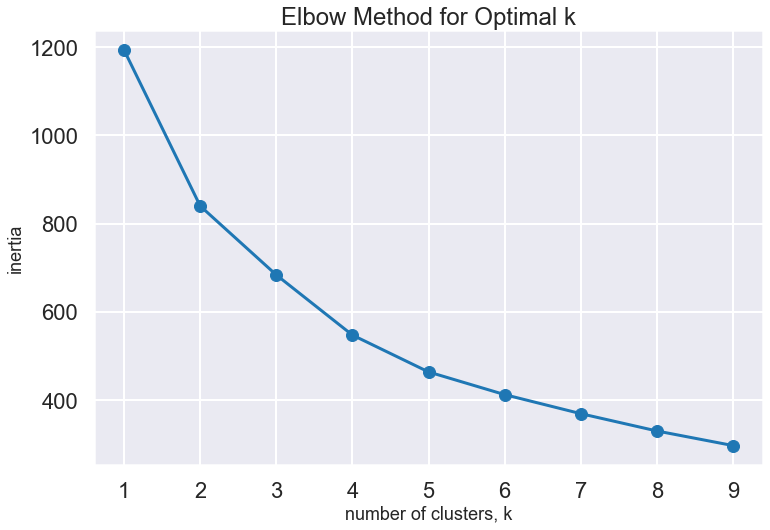

In [79]:
X = data_transformed
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    result= model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.title('Elbow Method for Optimal k')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k',fontsize=18)
plt.ylabel('inertia',fontsize=18)
plt.xticks(ks)
plt.show()

In the plot above the elbow is at k=4 indicating the optimal k for this dataset is 4

In [68]:
Km = KMeans(n_clusters=4).fit(data_transformed)
labels = Km.labels_

In [69]:
new_labels = pd.DataFrame({'Labels':labels})

df = pd.concat([new_data,new_labels],axis=1)

In [70]:
df.head()

,Spending,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FT_Point,FT_Winner,FT_Draw,FT_Loss,HT_Winner,HT_Draw,HT_Loss,Target_Home%,Target_Away%,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw,Diff_Score,Labels
0,-143.7,4.0,0.0,2.0,0.0,18.0,5.0,8.0,2.0,14.0,9.0,5.0,4.0,1.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,44.44,40.00,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1,-143.7,0.0,2.0,0.0,1.0,8.0,16.0,2.0,6.0,6.0,13.0,6.0,7.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,25.00,37.50,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0
2,-143.7,1.0,0.0,1.0,0.0,22.0,6.0,8.0,2.0,8.0,14.0,8.0,5.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,36.36,33.33,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-143.7,1.0,2.0,0.0,2.0,12.0,10.0,5.0,4.0,9.0,12.0,4.0,4.0,3.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,41.67,40.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
4,-143.7,1.0,2.0,0.0,1.0,11.0,17.0,3.0,10.0,17.0,16.0,5.0,4.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,27.27,58.82,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0


C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


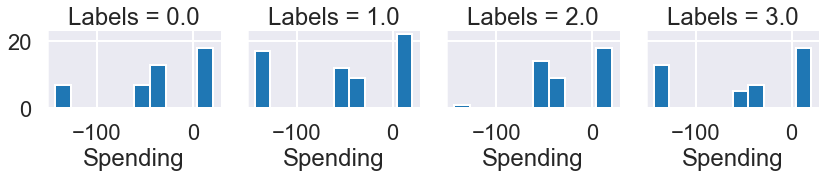

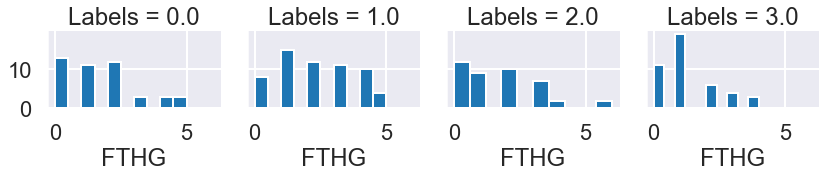

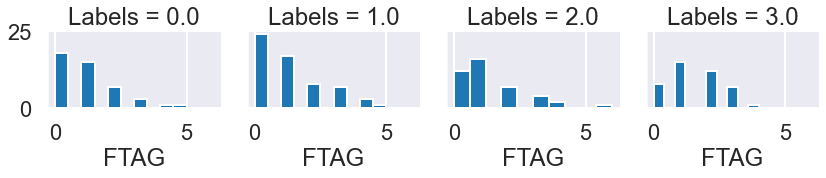

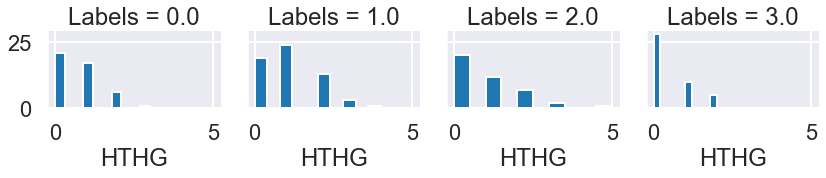

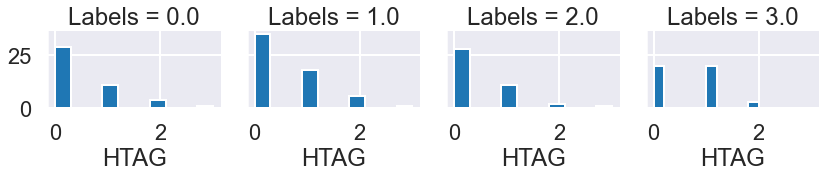

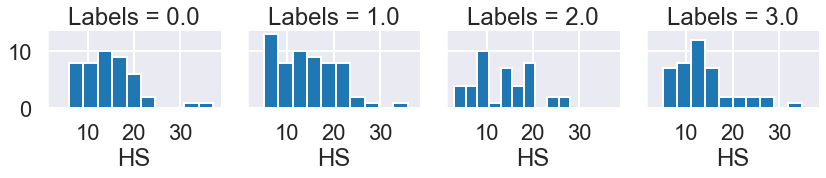

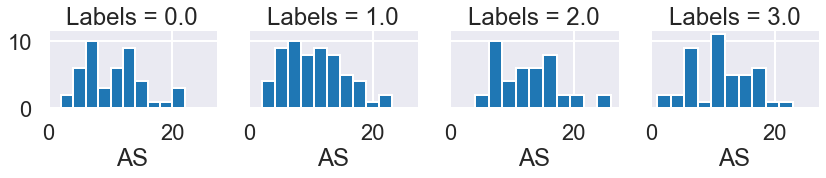

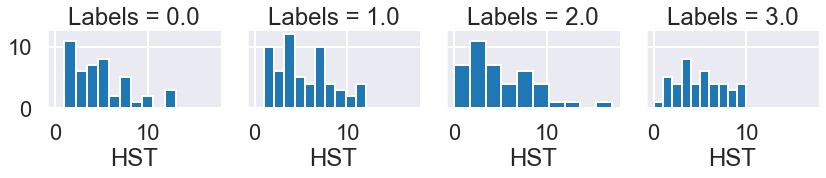

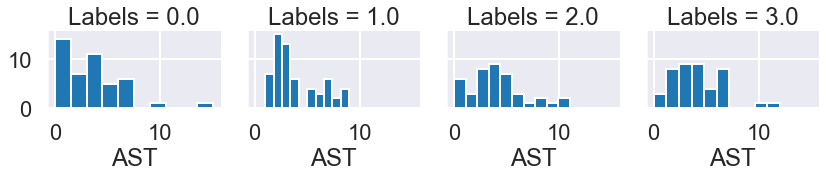

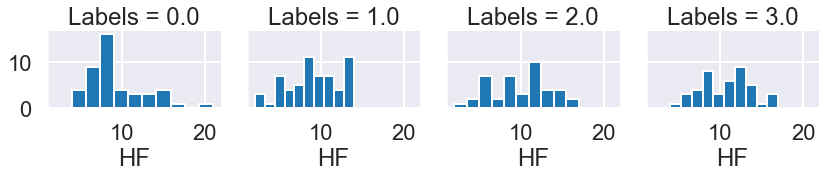

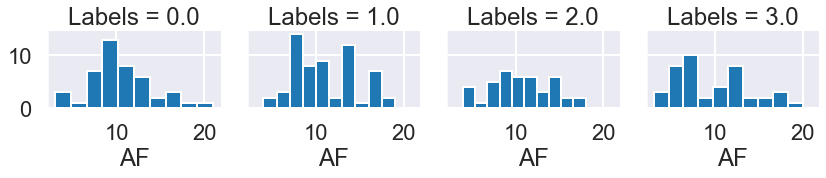

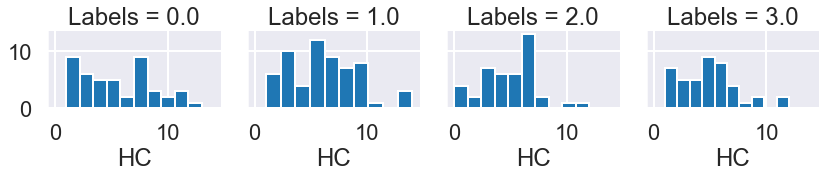

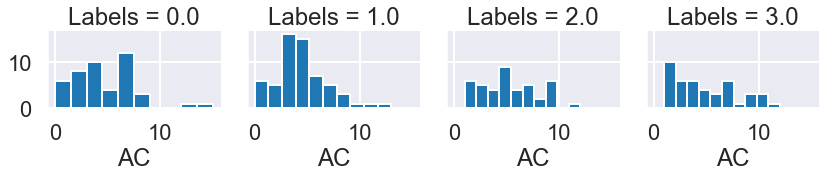

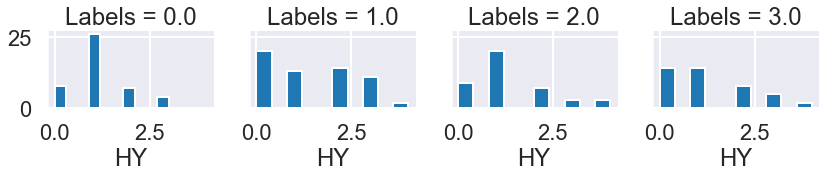

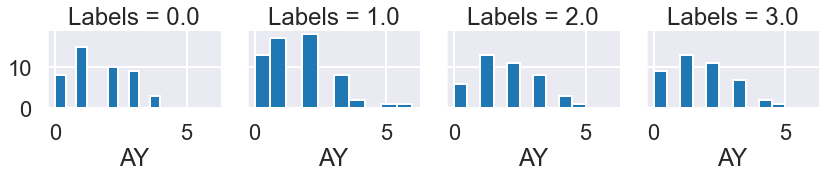

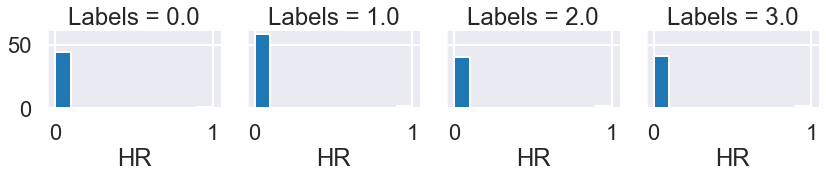

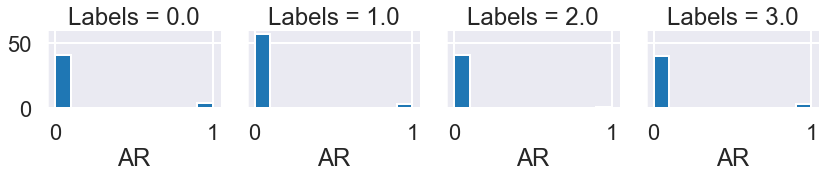

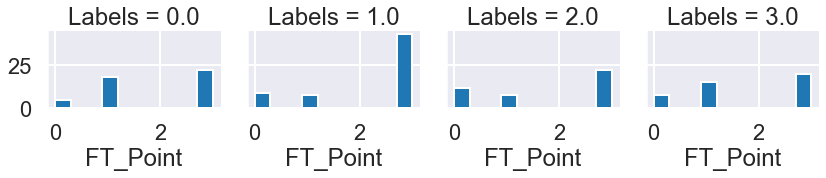

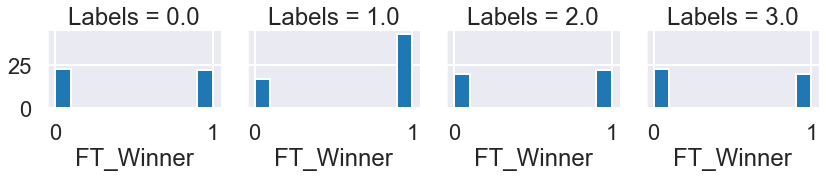

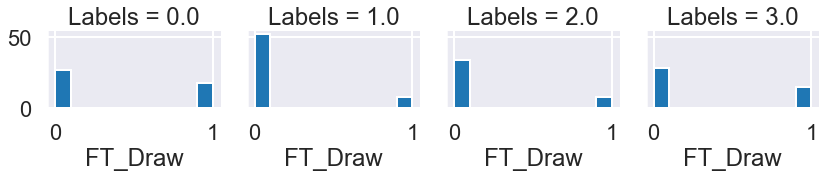

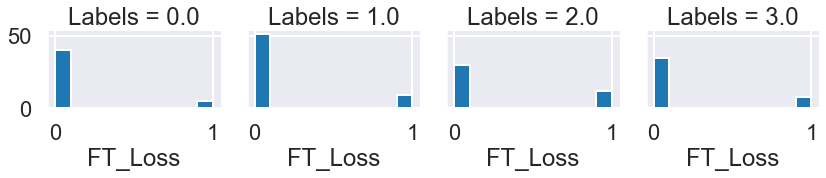

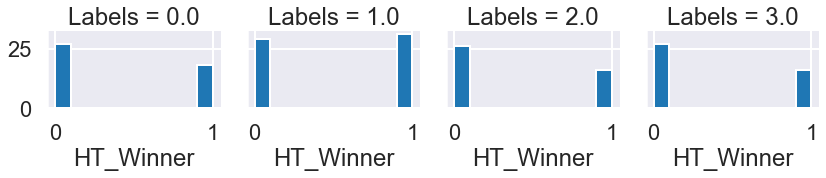

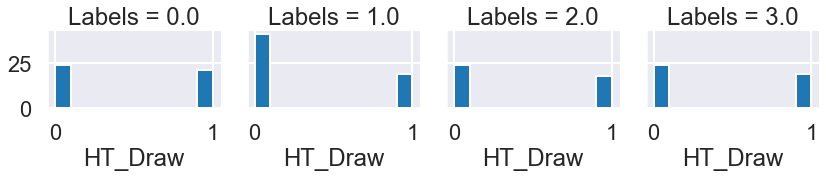

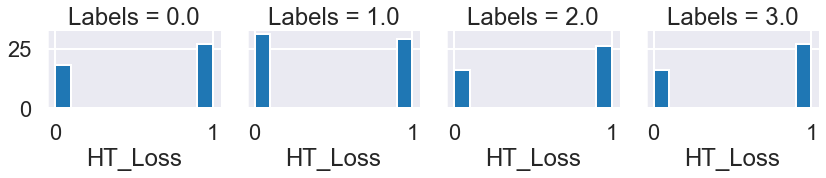

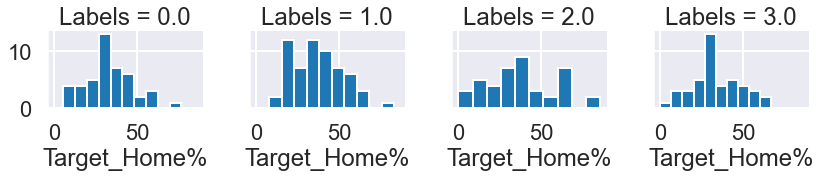

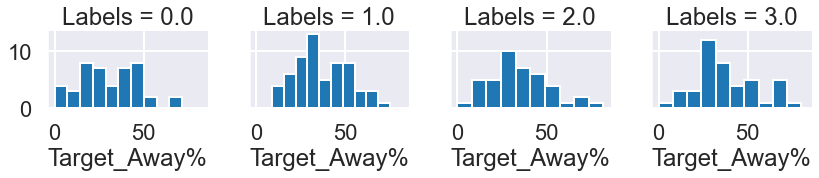

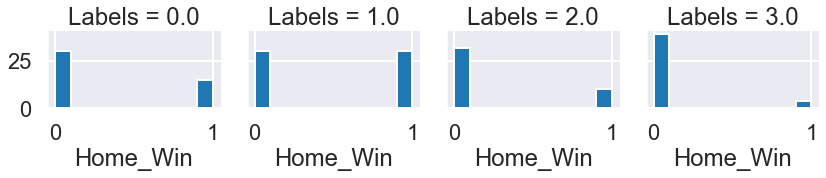

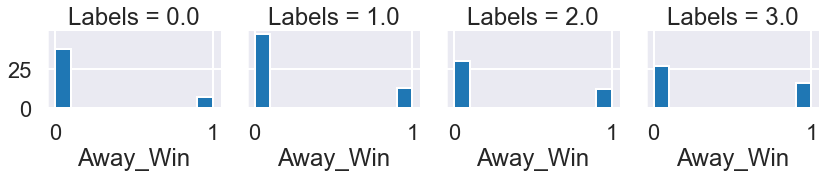

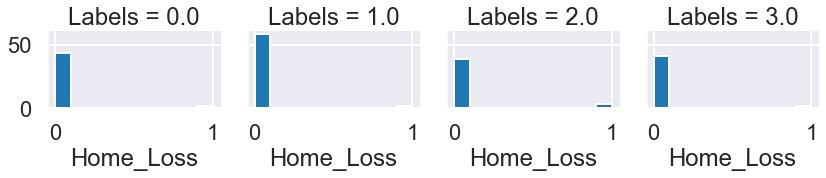

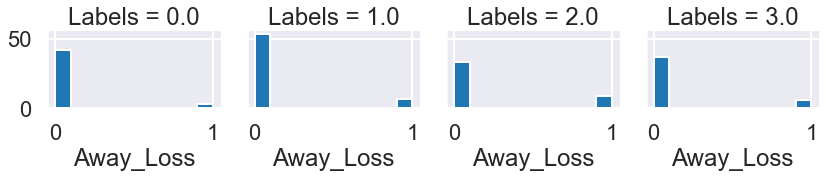

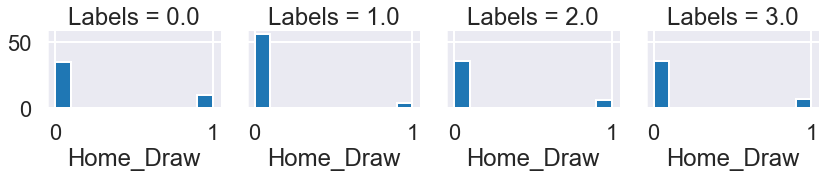

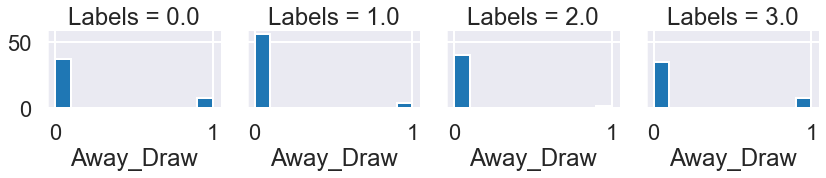

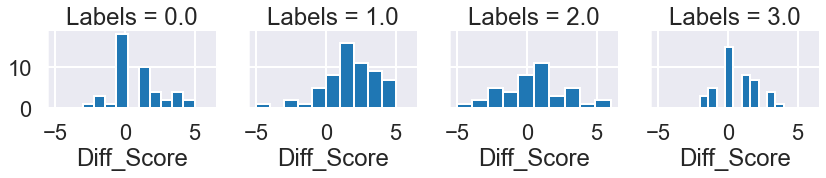

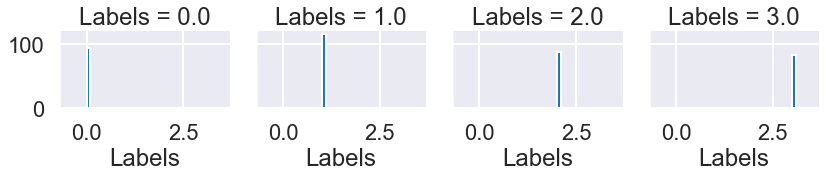

In [71]:
for c in df:
    grid =sns.FacetGrid(df,col='Labels')
    grid.map(plt.hist,c)
    pd.reset_option("display.max_rows")

In [72]:
# Create a DataFrame with labels and varieties as columns: df
pd.set_option('display.max_columns', 500)
df.groupby('Labels').mean()

,Spending,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FT_Point,FT_Winner,FT_Draw,FT_Loss,HT_Winner,HT_Draw,HT_Loss,Target_Home%,Target_Away%,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw,Diff_Score
Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-34.978444,1.577778,1.044444,0.711111,0.488889,14.866667,10.111111,4.911111,3.288889,9.488889,10.511111,5.555556,4.555556,1.155556,1.644444,0.022222,0.088889,1.866667,0.488889,0.400000,0.111111,0.400000,0.466667,0.600000,33.431556,30.325333,0.333333,0.155556,0.044444,0.066667,0.222222,0.177778,0.888889
1.0,-51.337167,2.200000,1.183333,1.050000,0.550000,14.583333,10.583333,5.366667,3.866667,9.033333,10.916667,6.100000,4.416667,1.366667,1.600000,0.033333,0.050000,2.283333,0.716667,0.133333,0.150000,0.516667,0.316667,0.483333,37.370500,37.030000,0.500000,0.216667,0.033333,0.116667,0.066667,0.066667,1.283333
2.0,-23.764524,1.666667,1.333333,0.880952,0.428571,13.452381,12.476190,5.047619,4.214286,9.785714,10.619048,4.857143,5.428571,1.309524,1.809524,0.047619,0.023810,1.761905,0.523810,0.190476,0.285714,0.380952,0.428571,0.619048,37.581190,34.350952,0.238095,0.285714,0.071429,0.214286,0.142857,0.047619,0.523810
3.0,-49.367674,1.279070,1.488372,0.465116,0.604651,13.372093,11.186047,4.558140,4.046512,10.697674,9.813953,5.046512,5.000000,1.232558,1.604651,0.046512,0.069767,1.744186,0.465116,0.348837,0.186047,0.372093,0.441860,0.627907,34.113256,37.629767,0.093023,0.372093,0.046512,0.139535,0.162791,0.186047,0.627907


### Cluster 1 (Spending £34M - median spending results in win or draw)

- Takes less shots during away matches.
- Losing more games at home.
- The gap between percentage of wins and draws isn't huge.
- Wins twice as many matches at home then away.

### Cluster 2 (Spending £51M - more spending more winning)

- Spending more money on transfers

- Scores more goals at both full time and half time

- 70% of the matches result in winning

- percentage of draws and losses are the same.

- Match result in higher goal difference



### Cluster 3 (Spending £23M - less spending more losing)

- Losing twice as many matches than other groups
- Losing more matches away
- Fewer matches result in draw 
- Match result in fewer goal difference meaning majority of the matches are won or lost.

### Cluster 4 (Spending £49M - more spending more draws)

- Scoring more goal on away matches

- 34% of the matches result in draws

- Higher percentage of shots are hit on target in away matches (this could be due to more shots been taken)

- Match result in fewer goal difference meaning majority of the matches are won or draw.

Conclusion from K-Mean Clustering - We can see there are some evidence to suggest spending more money can result in losing less matches which means the final result is either draw or win. However, there are no concrete evidence to suggest more spending leads to more matches won and this can be seen from Cluster 2 (more spending more winning) and Cluster 4 (more spending more draws). As a Liverpool fan, I can say maybe more spending on the right players and good team environment can lead to winning more matches.

# Hierarchical clustering

Lets see if I can get the same result using hierarchical clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

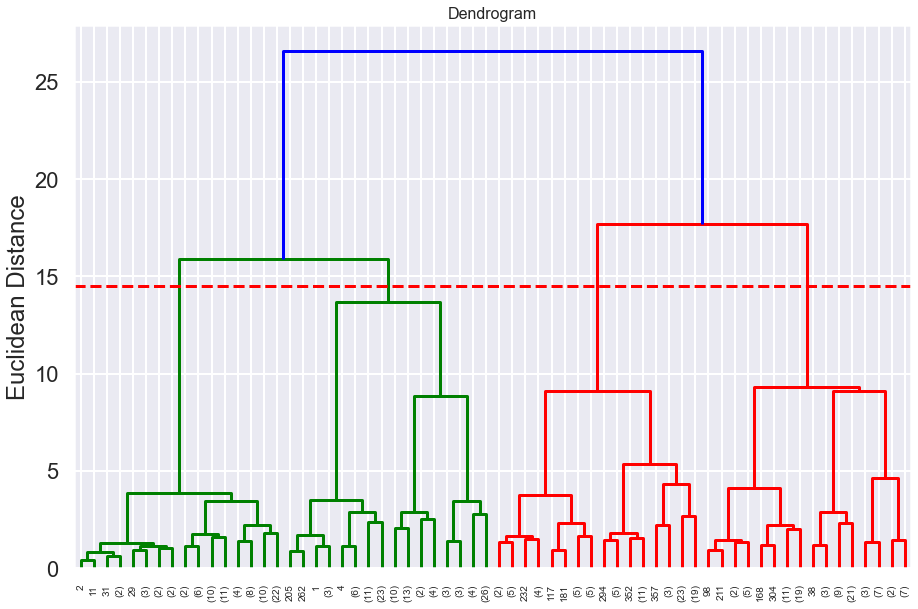

In [80]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: ward
mergings = linkage(data_transformed,method='ward')

# Plot the dendrogram
plt.figure(figsize=(15,10))
dendrogram(mergings,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=14.5, color='r', linestyle='--')
plt.title('Dendrogram',fontsize=16)
plt.ylabel('Euclidean Distance')
plt.show()

In [74]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [75]:
model.fit(data_transformed)

AgglomerativeClustering(n_clusters=4)

In [76]:
clusters_agg=pd.concat([new_data, pd.DataFrame({'cluster':model.labels_})], axis=1)
clusters_agg.head()

,Spending,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FT_Point,FT_Winner,FT_Draw,FT_Loss,HT_Winner,HT_Draw,HT_Loss,Target_Home%,Target_Away%,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw,Diff_Score,cluster
0,-143.7,4.0,0.0,2.0,0.0,18.0,5.0,8.0,2.0,14.0,9.0,5.0,4.0,1.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,44.44,40.00,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
1,-143.7,0.0,2.0,0.0,1.0,8.0,16.0,2.0,6.0,6.0,13.0,6.0,7.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,25.00,37.50,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
2,-143.7,1.0,0.0,1.0,0.0,22.0,6.0,8.0,2.0,8.0,14.0,8.0,5.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,36.36,33.33,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,-143.7,1.0,2.0,0.0,2.0,12.0,10.0,5.0,4.0,9.0,12.0,4.0,4.0,3.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,41.67,40.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-143.7,1.0,2.0,0.0,1.0,11.0,17.0,3.0,10.0,17.0,16.0,5.0,4.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,27.27,58.82,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
clusters_agg.groupby('cluster').mean()


,Spending,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FT_Point,FT_Winner,FT_Draw,FT_Loss,HT_Winner,HT_Draw,HT_Loss,Target_Home%,Target_Away%,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw,Diff_Score
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-49.415833,1.483333,1.366667,0.483333,0.566667,14.533333,10.816667,5.016667,3.983333,10.350000,9.933333,5.883333,4.616667,1.266667,1.750000,0.050000,0.050000,1.866667,0.516667,0.316667,0.166667,0.366667,0.466667,0.633333,34.217167,37.740667,0.233333,0.283333,0.050000,0.116667,0.166667,0.150000,0.783333
1.0,-34.978444,1.577778,1.044444,0.711111,0.488889,14.866667,10.111111,4.911111,3.288889,9.488889,10.511111,5.555556,4.555556,1.155556,1.644444,0.022222,0.088889,1.866667,0.488889,0.400000,0.111111,0.400000,0.466667,0.600000,33.431556,30.325333,0.333333,0.155556,0.044444,0.066667,0.222222,0.177778,0.888889
2.0,-23.764524,1.666667,1.333333,0.880952,0.428571,13.452381,12.476190,5.047619,4.214286,9.785714,10.619048,4.857143,5.428571,1.309524,1.809524,0.047619,0.023810,1.761905,0.523810,0.190476,0.285714,0.380952,0.428571,0.619048,37.581190,34.350952,0.238095,0.285714,0.071429,0.214286,0.142857,0.047619,0.523810
3.0,-52.048605,2.279070,1.232558,1.255814,0.581395,13.441860,10.860465,5.046512,3.883721,8.860465,11.186047,5.348837,4.720930,1.372093,1.395349,0.023256,0.069767,2.325581,0.744186,0.093023,0.162791,0.581395,0.232558,0.418605,38.513256,36.638140,0.465116,0.279070,0.023256,0.139535,0.023256,0.069767,1.325581


Hierarchical clustering groups looks similar to K-Mean clustering.

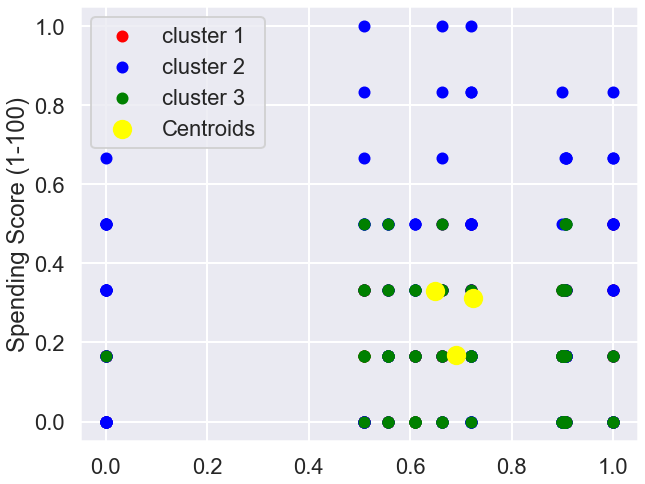

In [47]:
# kmeans_1=KMeans(n_clusters=3)
# kmeans_1.fit(X)
# cluster_pred=kmeans_1.predict(X)
# cluster_center=kmeans_1.cluster_centers_

# plt.figure(figsize=(10,8))

# plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,2], s = 100, c = 'red', label ='cluster 1' )
# plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,2], s = 100, c = 'blue', label ='cluster 2' )
# plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,2], s = 100, c = 'green', label ='cluster 3' )
# plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, c = 'yellow', label = 'Centroids')
# # plt.title('Clusters of customers')
# # plt.xlabel('Monthly Income ')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()